In [1]:
#Logistic Regression on Crypto
#sorce code by LeSniper
#home by ryoung
#Will it go up or down? (Created Live on Video)
from os import system
system("clear")


0

In [2]:
#Load CSV into a Dataframe
import pandas as pd
xmrdf=pd.read_csv('data/Monero.csv', sep=',', header='infer')
# btcdf=pd.read_csv('data/Bitcoin.csv', sep=',', header='infer')
#print(btcdf.values)

# ethdf=pd.read_csv('data/Ethereum.csv', sep=',', header='infer')
xprdf=pd.read_csv('data/XPR.csv', sep=',', header='infer')
#print(ethdf.values)

In [3]:

#Cleanup data by just 2017-2021 for both
#Find 2017 row number, row 2359
count = 0
for row in xmrdf['Date']:
    if '2016' in row:
        print(row)
        print(count)
        break
    count +=1

cleanxmrdf = xmrdf.drop(
    labels=range(0,count), #2359
    axis=0,
    inplace=False
)

print(len(cleanxmrdf))
# print(cleanxmrdf.values)

2016-01-01
336
2063


In [4]:
#Next lets drop first row (SNo)
cleanxmrdf.drop(labels=['SNo'], axis=1, inplace=True)


In [5]:
#Reset index since the row removal doesn't do that
cleanxmrdf = cleanxmrdf.reset_index(drop=True)


In [6]:
print(cleanxmrdf)


            Date    Price     Open     High      Low      Vol.  Change %
0     2016-01-01    0.543    0.490    0.543    0.430    1960.0     10.81
1     2016-01-02    0.460    0.543    0.590    0.439     590.0    -15.30
2     2016-01-03    0.488    0.460    0.488    0.460      20.0      5.98
3     2016-01-04    0.470    0.488    0.549    0.470       0.0     -3.59
4     2016-01-05    0.470    0.470    0.549    0.470    2610.0      0.00
...          ...      ...      ...      ...      ...       ...       ...
2058  2021-08-20  282.096  264.272  283.506  262.353  104570.0      6.76
2059  2021-08-21  287.914  282.143  293.290  272.711   90820.0      2.06
2060  2021-08-22  306.195  288.010  306.728  275.917  113580.0      6.35
2061  2021-08-23  318.494  306.274  334.650  302.268  164950.0      4.02
2062  2021-08-24  319.757  318.494  323.748  311.623   82530.0      0.40

[2063 rows x 7 columns]


had to change the formatting of XPR.csv - it had short days ( 10-03-15) for example and the code is looking for 10-03-2015 - so it was just easier to reformat in excel. I check 2 other csv and they had long dates - so I am just fixing the csv and not fixing it in code


In [7]:
#Do the same thng for ethereum
count = 0
for row in xprdf['Date']:
    if '2016' in row:
        print(row)
        print(count)
        break
    count +=1

cleanxprdf = xprdf.drop(
    labels=range(0,count), #297
    axis=0,
    inplace=False
)

print(len(cleanxprdf))
print(cleanxprdf.values)

01-01-2016
344
2063
[[2063 '01-01-2016' 0.0055 ... 0.00513 0 5.67]
 [2062 '01-02-2016' 0.00513 ... 0.005 500 -6.82]
 [2061 '01-03-2016' 0.0052 ... 0.005 20 1.46]
 ...
 [3 '08-22-2021' 1.22574 ... 1.18284 530740000 0.75]
 [2 '08-23-2021' 1.24617 ... 1.2115 927810000 1.67]
 [1 '08-24-2021' 1.24856 ... 1.21836 781950000 0.19]]


We want as input, BTC open/close and ETH open. Then as output
we want ETH closing price. The idea is to see if we can predict
the closing ETH price for the day based on how Bitcoin performed
the same day and what the starting price of ETH was that day.
This is to see if there is a correlation between both cryptos.

In [8]:
#Next lets drop first row (SNo)
cleanxprdf.drop(labels=['SNo'], axis=1, inplace=True)
#Reset index since the row removal doesn't do that
cleanxprdf = cleanxprdf.reset_index(drop=True)


In [9]:

print(len(cleanxmrdf),'==',len(cleanxprdf))

2063 == 2063


In [10]:


#We want as input, BTC open/close and ETH open. Then as output
#we want ETH closing price. The idea is to see if we can predict
#the closing ETH price for the day based on how Bitcoin performed
#the same day and what the starting price of ETH was that day.
#This is to see if there is a correlation between both cryptos.

#First let's lego both dataframe together
# btcethdf = pd.concat([cleanbtcdf, cleanethdf], axis=1, join='outer')


bothdf = pd.concat([cleanxmrdf, cleanxprdf], axis=1, join='outer')
#print(btcethdf)

#Let's rename columns and remove the duplicate Date column
#
print(bothdf.columns)

bothdf.columns = ['Date', 'xmrPrice', 'xmrOpen', 'xmrHigh', 
 'xmrLow', 'xmrVol', 'xmrChange', 'xprDate', 'xprPrice', 
 'xprOpen', 'xprHigh', 'xprLow', 'xprVol', 'xprChange']

bothdf.drop(labels=['xprDate'], axis=1,inplace=True)

print(bothdf)
#print(btcethdf.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Date',
       'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'],
      dtype='object')
            Date  xmrPrice  xmrOpen  xmrHigh   xmrLow    xmrVol  xmrChange  \
0     2016-01-01     0.543    0.490    0.543    0.430    1960.0      10.81   
1     2016-01-02     0.460    0.543    0.590    0.439     590.0     -15.30   
2     2016-01-03     0.488    0.460    0.488    0.460      20.0       5.98   
3     2016-01-04     0.470    0.488    0.549    0.470       0.0      -3.59   
4     2016-01-05     0.470    0.470    0.549    0.470    2610.0       0.00   
...          ...       ...      ...      ...      ...       ...        ...   
2058  2021-08-20   282.096  264.272  283.506  262.353  104570.0       6.76   
2059  2021-08-21   287.914  282.143  293.290  272.711   90820.0       2.06   
2060  2021-08-22   306.195  288.010  306.728  275.917  113580.0       6.35   
2061  2021-08-23   318.494  306.274  334.650  302.268  164950.0

In [11]:
print(bothdf)

            Date  xmrPrice  xmrOpen  xmrHigh   xmrLow    xmrVol  xmrChange  \
0     2016-01-01     0.543    0.490    0.543    0.430    1960.0      10.81   
1     2016-01-02     0.460    0.543    0.590    0.439     590.0     -15.30   
2     2016-01-03     0.488    0.460    0.488    0.460      20.0       5.98   
3     2016-01-04     0.470    0.488    0.549    0.470       0.0      -3.59   
4     2016-01-05     0.470    0.470    0.549    0.470    2610.0       0.00   
...          ...       ...      ...      ...      ...       ...        ...   
2058  2021-08-20   282.096  264.272  283.506  262.353  104570.0       6.76   
2059  2021-08-21   287.914  282.143  293.290  272.711   90820.0       2.06   
2060  2021-08-22   306.195  288.010  306.728  275.917  113580.0       6.35   
2061  2021-08-23   318.494  306.274  334.650  302.268  164950.0       4.02   
2062  2021-08-24   319.757  318.494  323.748  311.623   82530.0       0.40   

      xprPrice  xprOpen  xprHigh   xprLow     xprVol  xprChange

In [12]:

#Let's make our X Features (Closing Price is called 'Price')
crypto_X = bothdf[['xmrOpen', 'xmrHigh', 'xmrLow', 'xmrVol', 'xmrPrice', 'xprOpen']].copy()
#Our output Y:
crypto_Y = bothdf['xprPrice'].copy()

#change code to logistic regression
#1 is price goes up and 0 is price goes down
tmp_price = []

#should be 2062


for i in range(len(bothdf)):
    if bothdf['xmrPrice'][i] > bothdf['xmrOpen'][i]:
        tmp_price.append(1) #Higher close price (went up)
    else:
        tmp_price.append(0) #Lower/equal close than open (went down)
crypto_Y2 = pd.Series(tmp_price, copy=False)
print(len(crypto_Y2))


2063


In [13]:
print(crypto_Y2)
print(crypto_X)


0       1
1       0
2       1
3       0
4       0
       ..
2058    1
2059    1
2060    1
2061    1
2062    1
Length: 2063, dtype: int64
      xmrOpen  xmrHigh   xmrLow    xmrVol  xmrPrice  xprOpen
0       0.490    0.543    0.430    1960.0     0.543  0.00520
1       0.543    0.590    0.439     590.0     0.460  0.00513
2       0.460    0.488    0.460      20.0     0.488  0.00513
3       0.488    0.549    0.470       0.0     0.470  0.00520
4       0.470    0.549    0.470    2610.0     0.470  0.00510
...       ...      ...      ...       ...       ...      ...
2058  264.272  283.506  262.353  104570.0   282.096  1.23482
2059  282.143  293.290  272.711   90820.0   287.914  1.26316
2060  288.010  306.728  275.917  113580.0   306.195  1.21654
2061  306.274  334.650  302.268  164950.0   318.494  1.22577
2062  318.494  323.748  311.623   82530.0   319.757  1.24630

[2063 rows x 6 columns]


In [14]:

# #New Code for Logistic Regression
# tmp_price = [] #List stores a 1 for price go up and 0 for price go down

# for i in range(len(btcethdf)):
#     if btcethdf['ETHPrice'][i] > btcethdf['ETHOpen'][i]:
#         tmp_price.append(1) #Higher close price (went up)
#     else:
#         tmp_price.append(0) #Lower/equal close than open (went down)
# crypto_Y2 = pd.Series(tmp_price, copy=False)
# print(crypto_Y2)

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [15]:

#NEW: Modified Y to Y2 for log regr
#Split the data into training/testing sets randomly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    crypto_X, crypto_Y2, test_size=0.20, random_state=103)

#Create linear regression object
from sklearn import linear_model
# logregr = linear_model.LogisticRegression(random_state=103,
# solver="lbfgs", max_iter=10000)

# logregr = linear_model.SGDClassifier(random_state=103, loss='log', learning_rate='constant', eta0=0.01, max_iter=10000)

# logregr = linear_model.SGDClassifier( alpha=0.1, average=False, class_weight=None, epsilon=0.1, eta0=0.0,fit_intercept=True, 
# l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,  n_jobs=None, penalty='l2', 
# shuffle=False, tol=None, verbose=1, warm_start=False)


logregr = linear_model.LogisticRegressionCV(random_state=103, solver='lbfgs', max_iter=10000)


https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4

Logistic Regression by default uses Gradient Descent and as such it would be better to use SGD Classifier on larger data sets. One another reason you might want to use SGD Classifier is, logistic regression, in its vanilla sklearn form, won’t work if you can’t hold the dataset in RAM but SGD will still work.

In [16]:
#Train the model using the trianing set
# logregr.fit(X_train.values, y_train.values) #.values to remove warning
 

logregr.fit(X_train.values, y_train.values) #.values to remove warning

LogisticRegressionCV(max_iter=10000, random_state=103)

In [17]:
#Make predictions with the model we just training and comparing
#them with the expected results in the test data set
y_pred = logregr.predict(X_test)

In [18]:
print(y_pred)
print(y_test)


[0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1
 0 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1
 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 0 0 0]
1842    0
1416    1
838     1
125     0
1178    0
       ..
343     1
342     0
133     0
962     0
202     0
Length: 413, dtype: int64


In [19]:
#Metrics
from sklearn import metrics
trainscore = logregr.score(X_train, y_train)
testscore = logregr.score(X_test, y_test)
overallscore = logregr.score(crypto_X, crypto_Y2)

print("Accuracy Train:", trainscore)
print("Accuracy Test:",  testscore)
print("Accuracy Overall:", overallscore)
print("Count:", len(y_pred))
print(metrics.precision_recall_fscore_support(y_test, y_pred,
 labels=[0,1]))
print(metrics.confusion_matrix(y_test, y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print("Precision:", tp/(tp+fp)) #the less fp the better precision
print("Recall:", tp/(tp+fn)) #the less fn the better recall.
print("Harmonic:", 2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn)))


Accuracy Train: 0.9890909090909091
Accuracy Test: 0.9806295399515739
Accuracy Overall: 0.9873969946679593
Count: 413
(array([0.97536946, 0.98571429]), array([0.98507463, 0.97641509]), array([0.98019802, 0.98104265]), array([201, 212]))
[[198   3]
 [  5 207]]
198 3 5 207
Precision: 0.9857142857142858
Recall: 0.9764150943396226
Harmonic: 0.981042654028436


In [20]:
## Test
#Correct: 3329.47 ETH Closing price on 8/24
#Opening ETH price was 3322.6
#Bitcoin Open 49532.5 
#Bitcoin Close 49768.2
# from numpy import FPE_DIVIDEBYZERO, array as nparray
# answer = logregr.predict(nparray([[49532.5, 49768.2, 3322.6]]))
# print("Expected: 1, Predicted:", answer[0])

In [21]:
## test

#2/20/2022 5:25AM PST
#ETH OPEN  2723.79, ETH CLOSE 2630.48
#BTC OPEN 39891.25  BTC CLOSE 38240.97

# answer = logregr.predict(nparray([[39891.25, 38240.97, 2723.79]]))
# print("Expected: 0, Predicted:", answer[0])


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)



array([[198,   3],
       [  5, 207]])

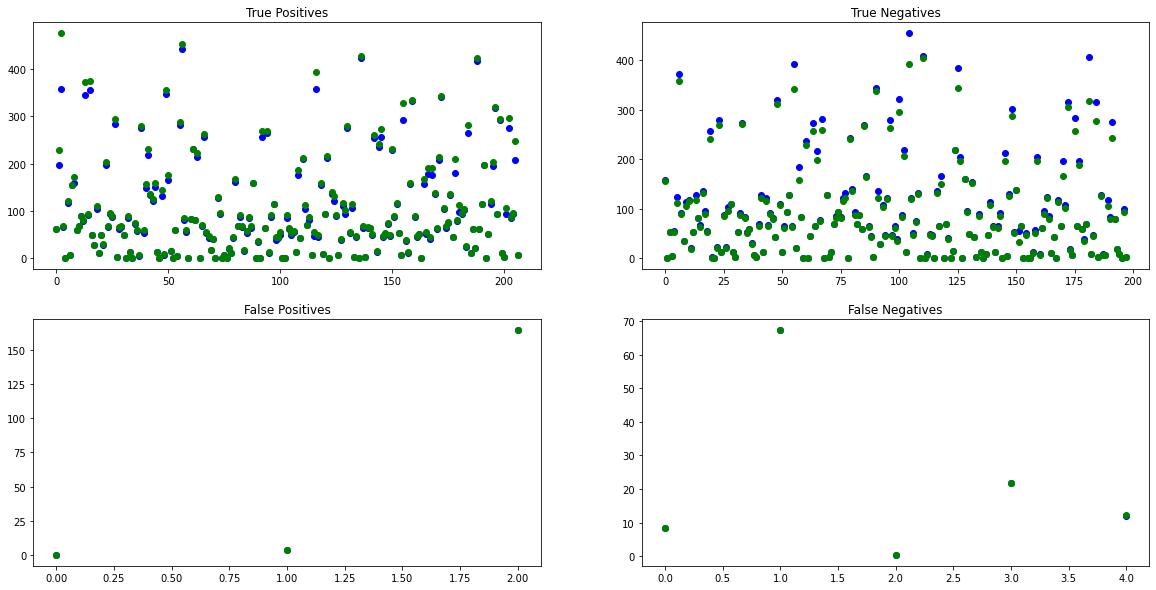

In [29]:
# Plot outputs
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)



TN = [[],[]]
FP = [[],[]]
FN = [[],[]]
TP = [[],[]]
for i in range(len(y_pred)):
    if y_pred[i] == 1 and y_test.values[i] == 1:   #TP
        TP[0].append(X_test['xmrOpen'].values[i])
        TP[1].append(X_test['xmrPrice'].values[i])
    elif y_pred[i] == 0 and y_test.values[i] == 0: #TN
        TN[0].append(X_test['xmrOpen'].values[i])
        TN[1].append(X_test['xmrPrice'].values[i])       
    elif y_pred[i] == 1 and y_test.values[i] == 0: #FP
        FP[0].append(X_test['xmrOpen'].values[i])
        FP[1].append(X_test['xmrPrice'].values[i])
    else: #y_pred[i] == 0 and y_test.values[i] == 1: #FN
        FN[0].append(X_test['xmrOpen'].values[i])
        FN[1].append(X_test['xmrPrice'].values[i])

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title('True Positives')
ax2.set_title('True Negatives')
ax3.set_title('False Positives')
ax4.set_title('False Negatives')

ax1.scatter(range(len(TP[0])), TP[0], color="blue")
ax1.scatter(range(len(TP[1])), TP[1], color="green")
ax2.scatter(range(len(TN[0])), TN[0], color="blue")
ax2.scatter(range(len(TN[1])), TN[1], color="green")
ax3.scatter(range(len(FP[0])), FP[0], color="blue")
ax3.scatter(range(len(FP[1])), FP[1], color="green")
ax4.scatter(range(len(FN[0])), FN[0], color="blue")
ax4.scatter(range(len(FN[1])), FN[1], color="green")

#ax1.scatter(range(28), TP[0][0:28], color="blue")
#ax1.scatter(range(28), TP[1][0:28], color="green")
#ax2.scatter(range(28), TN[0][0:28], color="blue")
#ax2.scatter(range(28), TN[1][0:28], color="green")
#ax3.scatter(range(28), FP[0][0:28], color="blue")
#ax3.scatter(range(28), FP[1][0:28], color="green")
#ax4.scatter(range(len(FN[0])), FN[0], color="blue")
#ax4.scatter(range(len(FN[1])), FN[1], color="green")

plt.show()
